In [2]:
import numpy as np

from error_generators import *

from scipy.linalg import expm, logm

In [3]:
egen = ErrorGen(1)
fvec = np.array(egen.features)
dvec = np.array(egen.dual_features)

/home/jpmarceaux/anaconda3/envs/ErrorGenerators/lib/python3.10/site-packages/pygsti/modelmembers/operations/lindbladerrorgen.py:1691: UserWarning: Using 'CPTP' as a Lindblad type is deprecated, and you should now use 'CPTPLND'
  _warnings.warn("Using 'CPTP' as a Lindblad type is deprecated, and you should now use 'CPTPLND'")


In [4]:
for idx, i in enumerate(egen.vec):
    print(idx, i)

0 {H}^{X}_{Gq0}
1 {H}^{Y}_{Gq0}
2 {H}^{Z}_{Gq0}
3 {S}^{X}_{Gq0}
4 {C}^{XxY}_{Gq0}
5 {A}^{XxY}_{Gq0}
6 {C}^{XxZ}_{Gq0}
7 {A}^{XxZ}_{Gq0}
8 {S}^{Y}_{Gq0}
9 {C}^{YxZ}_{Gq0}
10 {A}^{YxZ}_{Gq0}
11 {S}^{Z}_{Gq0}


In [5]:
Gx = np.round(expm(egen.features[0]*np.pi/4), 3)

In [6]:
Gx

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0., -1.],
       [ 0.,  0.,  1.,  0.]])

In [7]:
commutant = {
    'Hx' : egen.features[0], 
    'Sx' : egen.features[3], 
    'amp_damp' : egen.features[10] + (egen.features[8] + egen.features[11])
    }

In [8]:
rho0 = np.array([1, 0, 0, 1])
meas0 = np.array([1, 0, 0, 1])/2
meas1 = np.array([1, 0, 0, -1])/2

In [9]:
for lbl, mat in commutant.items():
    print(lbl, 'Gx^0 rho0', mat@rho0)
    print(lbl, 'Gx^1 rho0', mat@Gx@rho0)
    print(lbl, 'Gx^2 rho0', mat@Gx@Gx@rho0)
    print(lbl, 'Gx^3 rho0', mat@Gx@Gx@Gx@rho0)

Hx Gx^0 rho0 [ 0.  0. -2.  0.]
Hx Gx^1 rho0 [ 0.  0.  0. -2.]
Hx Gx^2 rho0 [0. 0. 2. 0.]
Hx Gx^3 rho0 [0. 0. 0. 2.]
Sx Gx^0 rho0 [ 0.  0.  0. -2.]
Sx Gx^1 rho0 [0. 0. 2. 0.]
Sx Gx^2 rho0 [0. 0. 0. 2.]
Sx Gx^3 rho0 [ 0.  0. -2.  0.]
amp_damp Gx^0 rho0 [ 0. -4.  0. -2.]
amp_damp Gx^1 rho0 [ 0. -4.  2.  0.]
amp_damp Gx^2 rho0 [ 0. -4.  0.  2.]
amp_damp Gx^3 rho0 [ 0. -4. -2.  0.]


In [10]:
for lbl, mat in commutant.items():
    print(lbl, 'meas0 Gx^0 rho0', meas0@mat@rho0)
    print(lbl, 'meas0 Gx^1 rho0', meas0@mat@Gx@rho0)
    print(lbl, 'meas0 Gx^2 rho0', meas0@mat@Gx@Gx@rho0)
    print(lbl, 'meas0 Gx^3 rho0', meas0@mat@Gx@Gx@Gx@rho0)

Hx meas0 Gx^0 rho0 0.0
Hx meas0 Gx^1 rho0 -1.0
Hx meas0 Gx^2 rho0 0.0
Hx meas0 Gx^3 rho0 1.0
Sx meas0 Gx^0 rho0 -1.0
Sx meas0 Gx^1 rho0 0.0
Sx meas0 Gx^2 rho0 1.0
Sx meas0 Gx^3 rho0 0.0
amp_damp meas0 Gx^0 rho0 -1.0
amp_damp meas0 Gx^1 rho0 0.0
amp_damp meas0 Gx^2 rho0 1.0
amp_damp meas0 Gx^3 rho0 0.0


In [11]:
for lbl, mat in commutant.items():
    print(lbl, 'meas1 Gx^0 rho0', meas1@mat@rho0)
    print(lbl, 'meas1 Gx^1 rho0', meas1@mat@Gx@rho0)
    print(lbl, 'meas1 Gx^2 rho0', meas1@mat@Gx@Gx@rho0)
    print(lbl, 'meas1 Gx^3 rho0', meas1@mat@Gx@Gx@Gx@rho0)

Hx meas1 Gx^0 rho0 0.0
Hx meas1 Gx^1 rho0 1.0
Hx meas1 Gx^2 rho0 0.0
Hx meas1 Gx^3 rho0 -1.0
Sx meas1 Gx^0 rho0 1.0
Sx meas1 Gx^1 rho0 0.0
Sx meas1 Gx^2 rho0 -1.0
Sx meas1 Gx^3 rho0 0.0
amp_damp meas1 Gx^0 rho0 1.0
amp_damp meas1 Gx^1 rho0 0.0
amp_damp meas1 Gx^2 rho0 -1.0
amp_damp meas1 Gx^3 rho0 0.0


# learning Hamiltonian plus stochastic error on an X gate

The error generator model is 
$$
    L = \theta_H H_x + \theta_S S_X + \theta_D (A_{Y.Z} + 0.5(S_Y + S_Z))
$$

We assume a set of clifford state preparation and measurement fiducials

I'll construct the matrices
$$
    H[i, j] = \langle \langle F_i(m_0) | H_X  | G_j(\rho_0) \rangle \rangle
$$
$$
    H[i, j] = \langle \langle F_i(m_0) | S_X  | G_j(\rho_0) \rangle \rangle
$$
$$
    H[i, j] = \langle \langle F_i(m_0) | (A_{Y.Z} + 0.5(S_Y + S_Z)) | G_j(\rho_0) \rangle \rangle
$$

The eigenvectors give the combination of experiments we should measure?


In [12]:
state_preps = {
    '0' : np.array([1, 0, 0, 1]),
    '1' : np.array([1, 0, 0, -1]),
    '+' : np.array([1, 1, 0, 0]),
    '-' : np.array([1, -1, 0, 0]),
    '+i' : np.array([1, 0, 1, 0]),
    '-i' : np.array([1, 0, -1, 0])
}

meas = {
    '0' : np.array([1, 0, 0, 1])/2,
    '1' : np.array([1, 0, 0, -1])/2,
    '+' : np.array([1, 1, 0, 0])/2,
    '-' : np.array([1, -1, 0, 0])/2,
    '+i' : np.array([1, 0, 1, 0])/2,
    '-i' : np.array([1, 0, -1, 0])/2
}

In [13]:
H_Hx = np.zeros((6, 6))
for idx_s, (slbl, s) in enumerate(state_preps.items()):
    for idx_m, (mlbl, m) in enumerate(meas.items()):
        H_Hx[idx_m, idx_s] =  m@commutant['Hx']@s
        
H_Sx = np.zeros((6, 6))
for idx_s, (slbl, s) in enumerate(state_preps.items()):
    for idx_m, (mlbl, m) in enumerate(meas.items()):
        H_Sx[idx_m, idx_s] =  m@commutant['Sx']@s
        
H_ad = np.zeros((6, 6))
for idx_s, (slbl, s) in enumerate(state_preps.items()):
    for idx_m, (mlbl, m) in enumerate(meas.items()):
        H_ad[idx_m, idx_s] =  m@commutant['amp_damp']@s

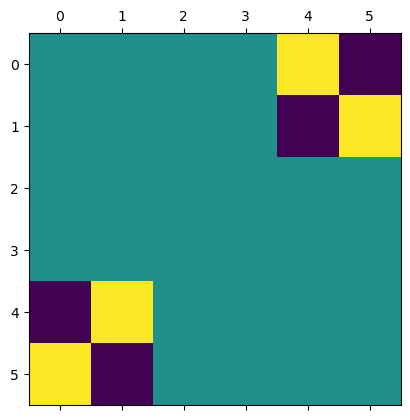

In [14]:
plt.matshow(H_Hx)

$$
    \langle \langle 0 | e^{\theta_h H_X} e^{\theta_s S_X} e^{\theta_d A_d} | +i \rangle \rangle = \langle \langle 0 | e^{\theta_h H_X}  | +i \rangle \rangle = 
$$
$$
    \sum_n \frac{\theta_h^n}{n!} \langle \langle 0 | H_X^n  | +i \rangle \rangle 
$$

using that 
$$
    \langle \langle 0 | H_X^n  | +i \rangle \rangle  = \begin{cases}  \frac{(-1)^n}{2} \text{if n odd}  \\ 0 \end{cases}
$$
we find
$$
    \langle \langle 0 | e^{\theta_h H_X}  | +i \rangle \rangle  = \frac{1}{2} + \frac{1}{2} \sum_{n} \frac{\theta_h^{2n+1}}{(2n+1)!} (-1)^{n}
$$
$$
    = \frac{1}{2} + \frac{1}{2}\sin(\theta_h)
$$

measuring stochastic X error 
Consider 
$$
    fd
$$

In [15]:
m_0@p_i

NameError: name 'm_0' is not defined

In [125]:
m_0 = meas['0']
p_i = state_preps['+i']
H_X = commutant['Hx']/2
print(m_0@H_X@H_X@H_X@H_X@H_X@p_i)

0.5


In [126]:
S_X  = commutant['Sx']/2
m_0 = meas['0']
p_0 = state_preps['0']

In [127]:
p_0

array([1, 0, 0, 1])

In [132]:
print(m_0@S_X@S_X@S_X@S_X@p_0)

0.5


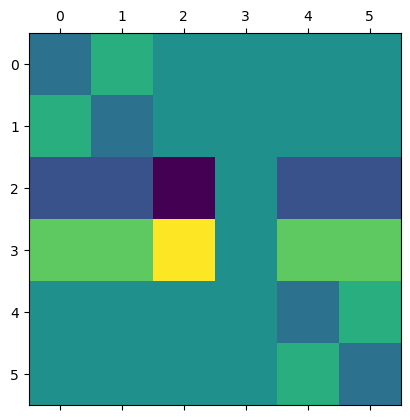

In [76]:
plt.matshow(H_ad)